2.19.0


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.6O4WQI_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Starting training for 3 epochs...
Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.4517 - loss: 1.5580 - val_accuracy: 0.8120 - val_loss: 0.5476
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.7096 - loss: 0.7619 - val_accuracy: 0.8474 - val_loss: 0.4571
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.7249 - loss: 0.6869 - val_accuracy: 0.8420 - val_loss: 0.4340


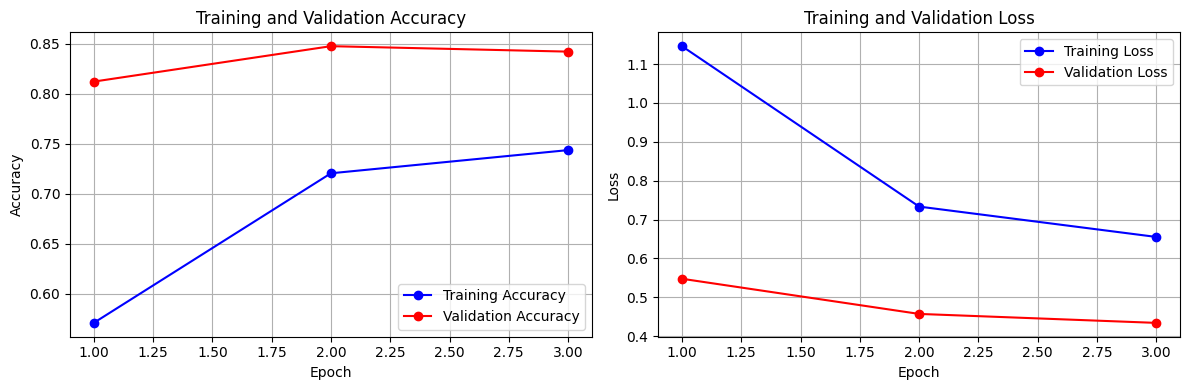


Test Accuracy after 3 epochs: 0.8610 (86.10%)
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8601 - loss: 0.3954
Test Accuracy: 0.86
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


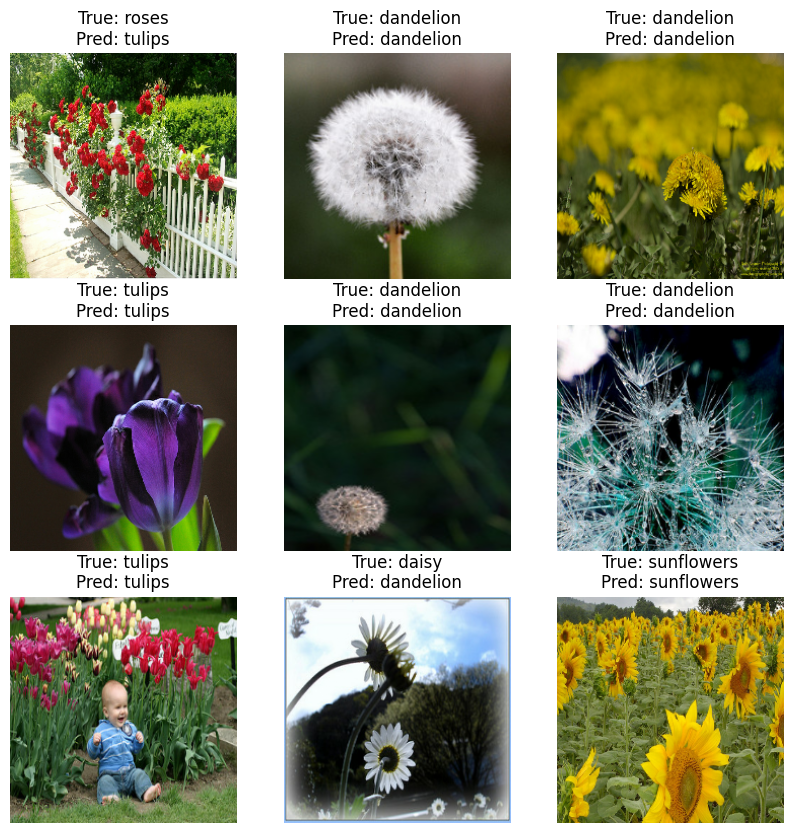

Final Test Accuracy: 0.8610 (86.10%)



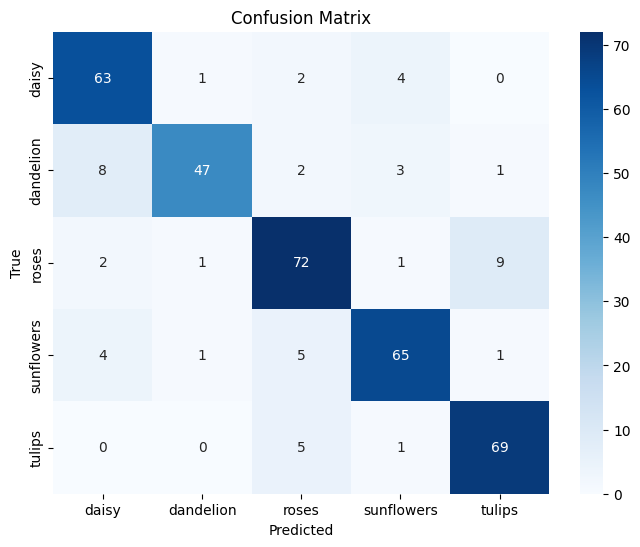

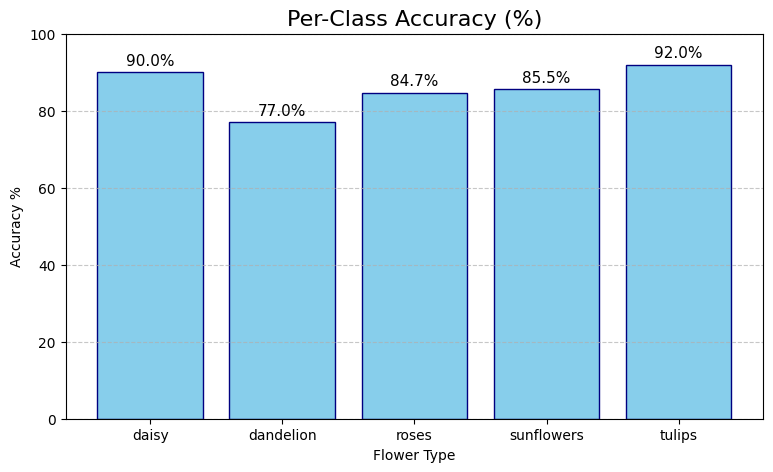


Classification Report:
              precision    recall  f1-score   support

       daisy       0.82      0.90      0.86        70
   dandelion       0.94      0.77      0.85        61
       roses       0.84      0.85      0.84        85
  sunflowers       0.88      0.86      0.87        76
      tulips       0.86      0.92      0.89        75

    accuracy                           0.86       367
   macro avg       0.87      0.86      0.86       367
weighted avg       0.86      0.86      0.86       367

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


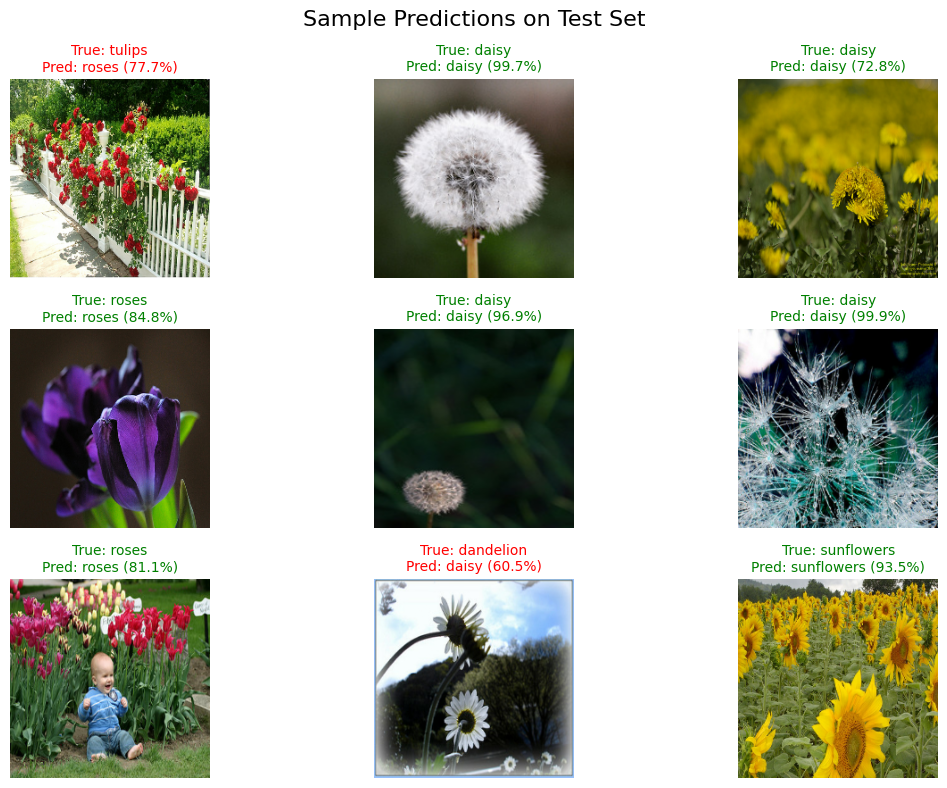

In [1]:
# Install necessary libraries (usually not needed in Colab, but for completeness)
!pip install tensorflow tensorflow-datasets matplotlib

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)  # Should be 2.x
# Cell 1 – Imports & basic setup
!pip install -q tensorflow tensorflow-datasets

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, applications

# Cell 2 – Load dataset
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
    shuffle_files=True
)

NUM_CLASSES = ds_info.features['label'].num_classes
IMG_SIZE = 224

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

BATCH_SIZE = 32

ds_train = ds_train.map(preprocess).cache().shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_val   = ds_val.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test  = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])
# -------------------------- FIXED MODEL CELL --------------------------
# Make sure these variables are already defined from previous cells:
# IMG_SIZE = 224
# NUM_CLASSES = 5
# data_augmentation (the Sequential augmentation layers)

import tensorflow as tf
from tensorflow.keras import layers, models, applications

# 1. Load MobileNetV2 as base (pre-trained on ImageNet)
base_model = applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,       # Remove the original classifier
    weights='imagenet'
)

# Freeze the base model (we'll only train the new top layers first)
base_model.trainable = False

# 2. Build the complete model
model = models.Sequential([
    data_augmentation,                    # Random flips, rotations, zoom
    base_model,
    layers.GlobalAveragePooling2D(),      # Converts feature maps to vector
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')  # 5 flower classes
])

# 3. Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Show model summary
model.summary()
# ---------------------------------------------------------------------

# Now you can continue with training:
# history = model.fit(ds_train, validation_data=ds_val, epochs=20, callbacks=[early_stopping])
# Callbacks (optional but good practice)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,           # just in case
    restore_best_weights=True
)

# TRAIN FOR ONLY 3 EPOCHS
EPOCHS = 3

print("Starting training for 3 epochs...")
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=1
)

# Plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)  # starts from 1 for nicer x-axis labels

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Final test accuracy
test_loss, test_acc = model.evaluate(ds_test, verbose=0)
print(f"\nTest Accuracy after 3 epochs: {test_acc:.4f} ({test_acc*100:.2f}%)")
# Evaluate on test set
test_loss, test_acc = model.evaluate(ds_test)
print(f"Test Accuracy: {test_acc:.2f}")
# Get a sample batch from test set
for images, labels in ds_test.take(1):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Display a few predictions
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])

        true_label = ds_info.features['label'].names[labels[i]]
        pred_label = ds_info.features['label'].names[predicted_labels[i]]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.show()

# For custom image: Upload an image in Colab and replace 'your_image.jpg'
# from google.colab import files
# uploaded = files.upload()
# img_path = next(iter(uploaded))
# img = tf.keras.utils.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
# img_array = tf.keras.utils.img_to_array(img) / 255.0
# img_array = tf.expand_dims(img_array, 0)
# pred = model.predict(img_array)
# pred_label = ds_info.features['label'].names[np.argmax(pred)]
# print(f"Predicted: {pred_label}")
# ============================ EVALUATION & VISUALIZATION ============================

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# 1. Evaluate on test set
test_loss, test_acc = model.evaluate(ds_test, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)\n")

# 2. Get true labels and predictions for the entire test set
y_true = []
y_pred = []

for images, labels in ds_test:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Class names (in order)
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# 3. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. Per-class accuracy bar chart
per_class_acc = cm.diagonal() / cm.sum(axis=1)
df_acc = pd.DataFrame({
    'Flower': class_names,
    'Accuracy': per_class_acc
})

plt.figure(figsize=(9, 5))
bars = plt.bar(df_acc['Flower'], df_acc['Accuracy']*100, color='skyblue', edgecolor='navy')
plt.title('Per-Class Accuracy (%)', fontsize=16)
plt.ylim(0, 100)
plt.ylabel('Accuracy %')
plt.xlabel('Flower Type')

# Add percentage on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Classification report (precision, recall, f1)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 6. Visualize some predictions
plt.figure(figsize=(12, 8))
for images, labels in ds_test.take(1):  # take one batch
    preds = model.predict(images)
    pred_labels = np.argmax(preds, axis=1)

    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        true_name = class_names[labels[i]]
        pred_name = class_names[pred_labels[i]]
        confidence = np.max(preds[i]) * 100
        color = 'green' if true_name == pred_name else 'red'
        plt.title(f"True: {true_name}\nPred: {pred_name} ({confidence:.1f}%)", color=color, fontsize=10)
        plt.axis('off')
plt.suptitle("Sample Predictions on Test Set", fontsize=16)
plt.tight_layout()
plt.show()
